<h1 style="color:rgb(0,120,170)">Assignment 3: Constrained Optimization, SVMs</h1><br>
<h2 style="color:rgb(0,120,170)">Copyrighting and Fare Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requiers you, as a student, to submit notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.<br>
Within the notebook we provide detailed instruction which you may want to follow, in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where evry part of the name strats from capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k)</li>
</ol>

Adding cells might badly influence your sumbission, in case if implementations in cells will depend on unexpected ones.
You may notice, that most cells are tagged, that is the way for unittest routine to recognise them.
We highly recommend you to develop your code within provided cells.

If you delete any cell or tag, it will be hard to evaluate respective part of assingment.

**Please be careful**, and may force be with you.

<h2 style="color:rgb(0,120,170)">Task 1: An easy constrained optimization problem </h2>

Consider the following primal problem: 

\begin{align*}
\text{Minimize} \qquad &4(w_1^4+w_2^4)
\\
\text{subject to} \qquad &4+w_1-w_2 \le 0 \\
\end{align*}

We try to solve it via two ways, thus do the following tasks:
* Compute the Lagrangian $L(w_1,w_2,\alpha)$.
* Calculate its derivatives with respect to $w_1$ and $w_2$ and calculate the zeros of these derivatives ($w_1^*,w_2^*$).

#q Solve it in both ways or can they choose here?

First way:

* Solve the problem using the KKT conditions.

Second way:
* Write down the dual problem and solve it directly WITHOUT the help of the KKT-conditions.

For your calculation use the proposed notation.

<h3 style="color:rgb(210,90,80)">Calculation 1 (25 points):</h3>

<ol>
    <li>Lagrangian function</li>
    $L(w_1,w_2,\alpha)=4*(w_1^4+w_2^4)+\alpha(4+w_1-w_2)$
    <br><br>
    <li>Derivatives of Lagrangian</li>
    $\frac{\partial L}{\partial w_1}=16w_1^3+\alpha \implies w_1^*=\sqrt[3]{-\frac{\alpha}{16}}=-\sqrt[3]{\frac{\alpha}{16}}$<br>
    $\frac{\partial L}{\partial w_2}=16w_2^3-\alpha \implies w_2^*=\sqrt[3]{\frac{\alpha}{16}}$
    <br><br>
    <li>Solving by using KKT conditions</li>
    <br>
    $\alpha*h(w_1^*,w_2^*)=0$<br>
    $\alpha*(4-2*\sqrt[3]{\frac{\alpha}{16}})=0$
    <br><br>
    $Case$ $1:$ $\alpha=0$
    <br><br>
    $\implies h(w_1^*,w_2^*)=(4-2*\sqrt[3]{\frac{0}{16}})=4 \nleq 0$
    <br><br>
    $Case$ $2:$ $h(w_1^*,w_2^*)=0$
    <br><br>
    $\implies 4-2*\sqrt[3]{\frac{0}{16}}=0\implies$<br>
    $\implies \sqrt[3]{\frac{\alpha}{16}}=2\implies$<br>
    $\implies \frac{\alpha}{16}=8\implies$<br>
    $\implies \alpha=128$
    <br><br>
    $\implies h(w_1^*,w_2^*)=(4-2*\sqrt[3]{\frac{128}{16}})=0 \leq 0$
    <br><br>
    $insert$ $into$ $w_1^*$ $and$ $w_2^*:$<br>
    $w_1^*=-\sqrt[3]{\frac{\alpha}{16}}=-\sqrt[3]{\frac{128}{16}}=-2$<br>
    $w_2^*=\sqrt[3]{\frac{\alpha}{16}}=\sqrt[3]{\frac{128}{16}}=2$
    <br><br>
    <li>Solving without KKT conditions</li>
    <br>
    $maximize$ $\mathcal{L}(\alpha)=L(w_1^*,w_2^*,\alpha)=$<br>
    $=8*\frac{\alpha}{16} \sqrt[3]{\frac{\alpha}{16}} +\alpha(4-2*\sqrt[3]{\frac{\alpha}{16}})$<br>
    $subject$ $to$ $\alpha \geq 0$
    <br><br>
    $\frac{d\mathcal{L}}{d\alpha}=\frac{4}{3}\sqrt[3]{\alpha}*\frac{8}{\sqrt[3]{16})^4}-\frac{4}{3}\sqrt[3]{\alpha}\frac{2}{\sqrt[3]{16}}+4=$<br>
    $=\frac{32*\sqrt[3]{\alpha}-128*\sqrt[3]{\alpha}}{3*(\sqrt[3]{16})^4}+4=$<br>
    $=4-\frac{32}{(\sqrt[3]{16})^4}*\sqrt[3]{\alpha}$
    <br><br>
    $set$ $derivative$ $to$ $0:$<br>
    $4-\frac{32}{(\sqrt[3]{16})^4}*\sqrt[3]{\alpha}=0 \implies$<br>
    $\implies \sqrt[3]{\alpha}=\frac{4*(\sqrt[3]{16})^4}{32} \implies$<br>
    $\implies \alpha=\Big(\frac{4*(\sqrt[3]{16})^4}{32}\Big)^3=128 \geq 0$
    <br><br>
    $insert$ $into$ $w_1^*$ $and$ $w_2^*:$<br>
    $w_1^*=-\sqrt[3]{\frac{\alpha}{16}}=-\sqrt[3]{\frac{128}{16}}=-2$<br>
    $w_2^*=\sqrt[3]{\frac{\alpha}{16}}=\sqrt[3]{\frac{128}{16}}=2$
</ol>

<h2 style="color:rgb(0,120,170)">Task 2: Importance weighted SVMs </h2>

Suppose you wish to use SVMs to solve a learning
problem where some training data points are more important than others. More
formally, assume that each training point consists of a triplet $(\mathbf{x}_i ,y_i ,p_i)$, where
$0 \le  p_i \le 1$ is the importance of the $i$-th point. 
The primal C-SVM constrained optimization problem with mis-labeling penalities according to the importances $p_i$ is given by:
\begin{align*}
\text{Minimize} \qquad &\frac{1}{2}\lVert \mathbf{w} \rVert_{2}^{2} + C \cdot \sum_{i=1}^{l}p_i\xi_{i}
\\
\text{subject to} \qquad
                    &-\left( y_{i}\left(\mathbf{w}\cdot\mathbf{x}_{i} + b\right) - 1 + \xi_{i} \right) \le 0\\
\text{and} \qquad                   &-\xi_{i} \le 0
\end{align*}
Solve the problem in the usual way by performing the following tasks:
* Compute the Lagrange function and calculate the zeros of the derivatives with respect to $w_i$, $b$ and $\xi_i$.
* Write down the dual function (named $\cal L$ in the slides) and the dual problem for this importance weighted SVM with the help of the KKT conditions. Be careful when computing the constraints!

Hint: this is very similar to the derivation of the C-SVM on the slides. Please also stick to the notation proposed there.

<h3 style="color:rgb(210,90,80)">Calculation 2 (25 points):</h3>

<ol>
    <li>Lagrangian function</li>
    $L(\mathbf{w},b,\xi_{1},...,\xi_{l},p_1,...,p_l;\alpha_{1},...,\alpha_{l},\lambda_{1},...,\lambda_{l})=$<br>
    $=\frac{1}{2}\lVert \mathbf{w} \rVert^{2} + C \cdot \sum_{i=1}^{l}p_i\xi_{i}-\sum_{i=1}^{l}\alpha_{i}\big(y_i(\mathbf{w}*\mathbf{x}_i-b)-1+\xi_{i}\big)-\sum_{i=1}^{l}\lambda_{i}\xi_{i}=$<br>
    $=\frac{1}{2}\lVert \mathbf{w} \rVert^{2} + C \cdot \sum_{i=1}^{l}p_i\xi_{i}-\mathbf{w}\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_i+b\sum_{i=1}^{l}\alpha_{i}y_i+\sum_{i=1}^{l}\alpha_{i}-\sum_{i=1}^{l}\xi_{i}\alpha_{i}-\sum_{i=1}^{l}\lambda_{i}\xi_{i}$
    <br><br>
    <li>Dual problem constraints</li>
    $\frac{\partial L}{\partial \mathbf{w}}=\mathbf{w}-\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_{i}=0 \implies \mathbf{w}^*=\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_{i}$<br>
    $\frac{\partial L}{\partial b}=\sum_{i=1}^{l}\alpha_{i}y_i=0 \implies \sum_{i=1}^{l}\alpha_{i}y_i=0$
    <br><br>
    $\frac{\partial L}{\partial \xi_{i}}=C*p_j-\alpha_{j}-\lambda_{j}=0$<br>
    $\implies \lambda_{j}=C*p_j-\alpha_{j}$ $for$ $all$ $j=1,...,l$<br>
    $\implies C=\frac{\lambda_{j}+\alpha_{j}}{p_j}$ $for$ $all$ $j=1,...,l$<br>
    $\lambda_{j} \geq 0 \implies C*p_j-\alpha_{j} \geq 0 \implies \alpha_{j} \leq C$ $for$ $all$ $j=1,...,l$
    <br><br> 
    <li>Dual function</li>
    $\mathcal{L}(\alpha_{1},...,\alpha_{l})=\frac{1}{2}\Big(\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_{i}\Big)^2+\sum_{i=1}^{l}\frac{(\lambda_{i}+\alpha_{i})p_i}{p_i}\xi_{i}-\Big(\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_{i}\Big)^2+b*0+\sum_{i=1}^{l}\alpha_{i}-\sum_{i=1}^{l}\xi_{i}\alpha_{i}-\sum_{i=1}^{l}\xi_{i}\lambda_{i}=$<br>
    $=\sum_{i=1}^{l}\alpha_{i}-\frac{1}{2}\Big(\sum_{i=1}^{l}\alpha_{i}y_i\mathbf{x}_{i}\Big)^2+\sum_{i=1}^{l}(\lambda_{i}\xi_{i}+\alpha_{i}\xi_{i})-\sum_{i=1}^{l}\xi_{i}\alpha_{i}-\sum_{i=1}^{l}\xi_{i}\lambda_{i}=$<br>
    $=\sum_{i=1}^{l}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{l}\sum_{j=1}^{l}\alpha_{i}\alpha_{j}y_i y_j\mathbf{x}_{i}\mathbf{x}_{j}+\sum_{i=1}^{l}\lambda_{i}\xi_{i}+\sum_{i=1}^{l}\alpha_{i}\xi_{i}-\sum_{i=1}^{l}\xi_{i}\alpha_{i}-\sum_{i=1}^{l}\xi_{i}\lambda_{i}=$<br>
    $=\sum_{i=1}^{l}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{l}\sum_{j=1}^{l}\alpha_{i}\alpha_{j}y_i y_j\mathbf{x}_{i}\mathbf{x}_{j}$
    <br><br>
    <li>Dual problem formulation</li>
    $Minimize:$ $-\mathcal{L}=\frac{1}{2}\mathbf{\alpha}^T\mathbf{Q}\mathbf{\alpha}-\mathbf{1}^T\mathbf{\alpha}$<br>
    $wrt.:$ $\mathbf{\alpha}$<br>
    $subject$ $to:$ $\mathbf{\alpha}^T\mathbf{y}=0$ $and$ $\mathbf{0} \leq \mathbf{\alpha} \leq C\mathbf{1}$
    <br><br>
    $KKT$ $conditions:$<br>
    $\alpha_{i}\big(y_i(\mathbf{w}*\mathbf{x}_{i}-b)-1+\xi_{i}\big)=0$ $for$ $all$ $i=1,...,l$<br>
    $\lambda_{i}\xi_{i}=(C*p_i-\alpha_{i})\xi_{i}=0$ $for$ $all$ $j=1,...,l$
    <br><br>
    $Case$ $1.1:$ $\alpha_{i}=0, p_i>0 \implies \xi_{i}=0\implies$ $\mathbf{x}_i$ $is$ $correctly$ $classified$<br>
    $Case$ $1.2:$ $\alpha_{i}=0, p_i=0 \implies \xi_{i} \geq 0\implies \xi_{i} can$ $be$ $anything \implies \mathbf{x}_i$ $can$ $be$ $correctly$ $classified$ $or$ $misclassified$<br>
    $Case$ $2:$ $0<\alpha_{i}<C*p_i \implies \xi_{i}=0 \implies$ $\mathbf{x}_i$ $is$ $support$ $vector$<br>
    $Case$ $3:$ $\alpha_{i}=C*p_i, p_i > 0 \implies \xi_{i}>0\implies$ $\mathbf{x}_i$ $is$ $misclassified$
</ol>

The aim of this task is to equip you with some intuition concerning the application of different SVMs to an easy data set. You should also observe how different versions of the SVMs with different hyperparameters react to additional noise. To this end we provided you a function plot_data, that is intended to create proper visualizations of important characteristics of linear and nonlinear SVMs, like the decision border and support vectors. The usual routine for applying SVMs in Python, which is also used here, is given by the following sklearn-package: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. 

Your first task is to get familiar with the plot_data function by applying it to the easy data set radial_data.csv. Iterate over different kernels and hyperparameters (consider the documentation for details):
* As a first task plot the dataset using the provided functions. (assign axs object returned from **plot_data** to **plot1** variable or plot data on your own, then assign fig or axs, ot plot object to **plot1**)
* Using the sklearn-package mentioned above, write a routine that applies an SVM with a polynomial kernel and $C=10$ to the data and iterates over the degrees from 1 to 5. Apply **plot_data** to each hyperparameter setting, store every axs object in **plot_list_2**

<h3 style="color:rgb(210,90,80)">Code 1 (10 points):</h3>

In [1]:
#Nothing to do here
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

np.random.seed(1234)  

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn import svm

In [2]:
#Nothing to do here
"""Function allows ro load datapoint from csv
@returns: tuple (X,y)"""
def load_data(id_data=1):
    if id_data ==1:
        Z = np.genfromtxt('radial_data.csv', delimiter=',')
        return Z[:,:-1], Z[:,-1]

"""Function creates space/grid. Mostly used for plotting"""
def get_meshgrid(X,resolution):
    s = np.max(np.abs(X))*1.05
    ls = np.linspace(-s, s, resolution)
    X1,X2 = np.meshgrid(ls, ls, sparse=False)
    return np.c_[X1.ravel(), X2.ravel()]

"""Plotting your data
@param model already trained SVM model, is None if you want to plot data only
all other parameters must be intuitively clear for you"""
def plot_data(X, y, 
              model=None,
              plot_boarders=True, 
              plot_classification=True,  
              plot_support_vectors = True,
              plot_size=7, 
              resolution=500, 
              title='data visualization', 
              color = ['blue','orange']):
    
    if model is not None:#if you want to plot model
        if plot_classification and plot_boarders:
            col=2  #if you want to plot model and boarders
        else :
            col=1  #if you want to plot model only
        
        fig,axs = plt.subplots(1,col,figsize=(plot_size*col,plot_size))
        
        grid = get_meshgrid(X,resolution)        
        V = model.support_vectors_
        mask_sv = model.support_ #np.where(np.isin(X[:,0],V[:,0]))[0] 
        
        kernel = model.kernel
        if kernel == 'poly':
            title = f"kernel: {kernel} - degree: {model.degree} - cost:{model.C}"
        elif kernel == 'rbf':
            title = f"kernel: {kernel}"
            if model.gamma != "auto_deprecated" :
                title+= f" - gamma: {model.gamma}" 
            title += f" - cost: {model.C}"
                
        
        for i in range(col): 
            if col>1:
                ax = axs[i]
            else:
                ax = axs
            ax.set_aspect('equal')
            if i==0 and plot_boarders:
                ax.set_title('Margins - ' + title,fontsize=plot_size*2)
                boarders = model.decision_function(grid)
                mask_pos = boarders >= 1
                mask_neg = boarders <= -1
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                ax.scatter(X[mask_sv,0], X[mask_sv,1], c='g',label= str(np.sum(model.n_support_)) +' SV',s=40,marker='o')
            if plot_classification and (i==1 or not plot_boarders):
                ax.set_title('Classification - ' + title,fontsize=plot_size*2)
                classification = model.predict(grid)
                mask_pos = classification > 0
                mask_neg = classification < 0
                ax.scatter(grid[mask_pos,0], grid[mask_pos,1], c=color[0], alpha=0.01, s=10)
                ax.scatter(grid[mask_neg,0], grid[mask_neg,1], c=color[1], alpha=0.01, s=10)
                classification = model.predict(X)
                mask_wrong = classification != y 
                ax.scatter(X[mask_wrong,0], X[mask_wrong,1], c='magenta',label=str(np.sum(mask_wrong)) + ' faults',s=40,marker='o')
            m = y > 0
            ax.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
            m = np.logical_not(m)
            ax.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
            ax.legend(loc='lower left', fontsize=plot_size*1.5)   
    
    
    else:
        fig,axs = plt.subplots(1,1,figsize=(plot_size,plot_size))
        axs.set_aspect('equal')
        m = y > 0
        axs.scatter(X[m,0], X[m,1], c=color[0],label='class +1',s=10)
        m = np.logical_not(m)
        axs.scatter(X[m,0], X[m,1], c=color[1],label='class -1',s=10)
        axs.legend(loc='lower left', fontsize=plot_size*1.5)
        plt.title(title, fontsize=plot_size*2)
    plt.show()
    return axs #returned object can be assigned to a plot variable

In [3]:
#load data
#leave as it is
X,y = load_data(1)

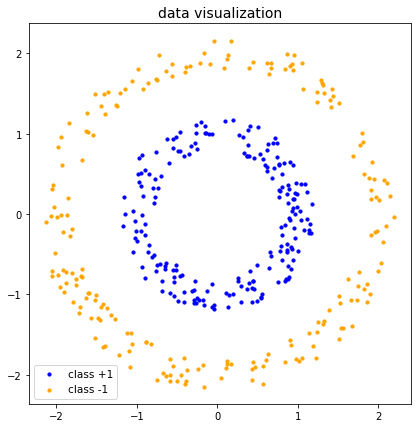

In [4]:
#plot your data ↓↓↓
plot1 = plot_data(X, y)

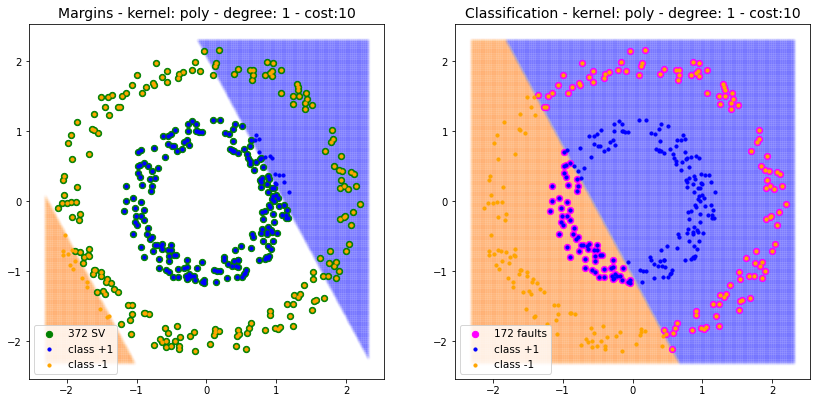

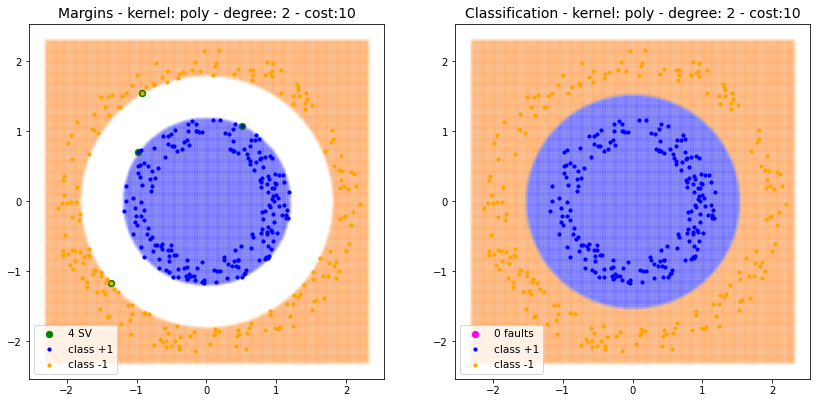

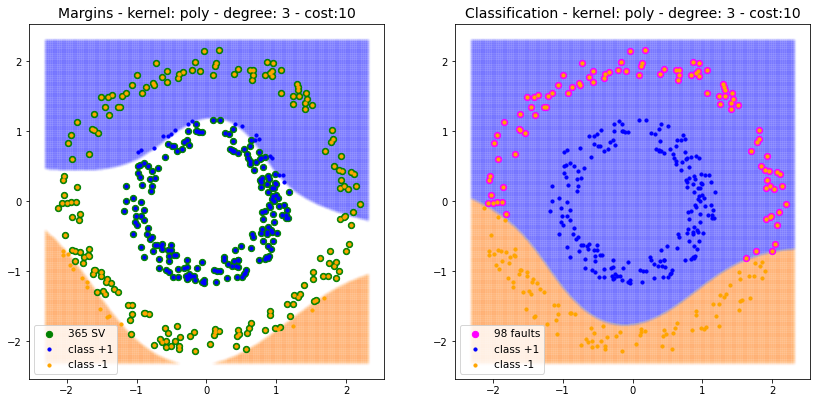

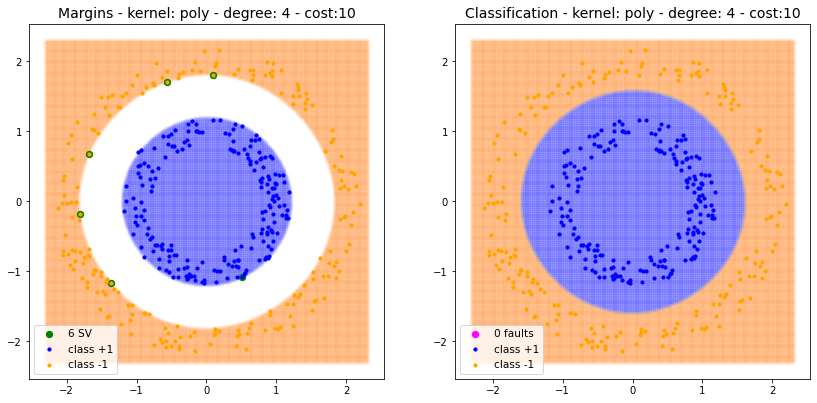

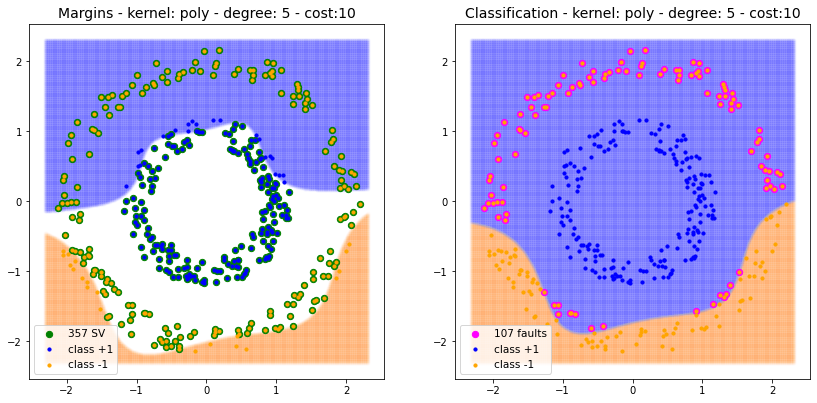

In [5]:
plots_list_2 = []
for degree in range(1,6):
    
    #your code ↓↓↓
    model = svm.SVC(C=10, kernel="poly", degree=degree)
    model.fit(X,y)
    #code ends here
    
    
    #storing plots for unittest (an example for upcoming code cells)
    #this way of storing a lot of plots is valid for this notebook only!
    axs = plot_data(X,y,model)
    plots_list_2.append(axs)

<h3 style="color:rgb(210,90,80)">Question 1 (5 points):</h3>

What observations can you make from your plots? (several answers may be correct)


_a) The SVM with polynomial degree=2 already seems to do quite well on the data set. <br>
_b)  The higher the polynomial degree, the better the classifier. <br>
_c)  A very high number of support vectors seems to be an indicator for a bad choice of the kernel. <br>
#q intention? (empty line)<br> 
_d) There is hardly any difference between the pictures that were produced by polynomial kernels of even degree. <br>
_e)  For kernels with odd degree the number of misclassified samples decreases with increasing degree. <br>

To answer the question assign to variables in the next cell **True** or **False** boolean values.<br>
To earn points **assign values to all variables**

In [6]:
example_true = True
example_False = False

a_ = True
b_ = False
c_ = True
d_ = True
e_ = False

Now apply an RBF-kernel and vary the $C$-parameter from close to $0$ to a very high value. After playing around a little bit, try to report on your observations in the subsequent question.

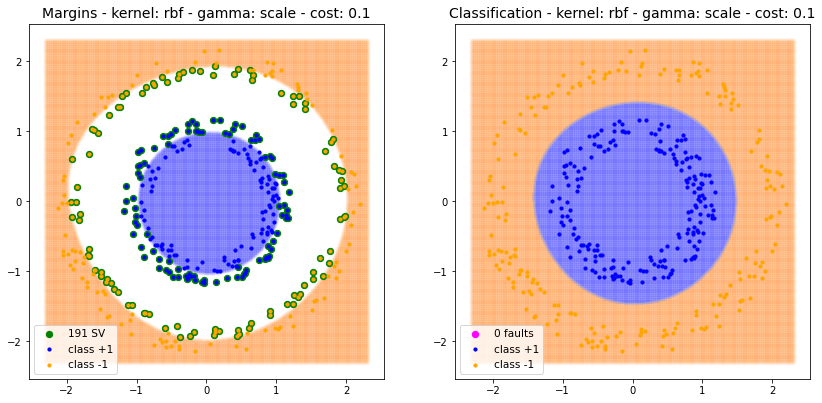

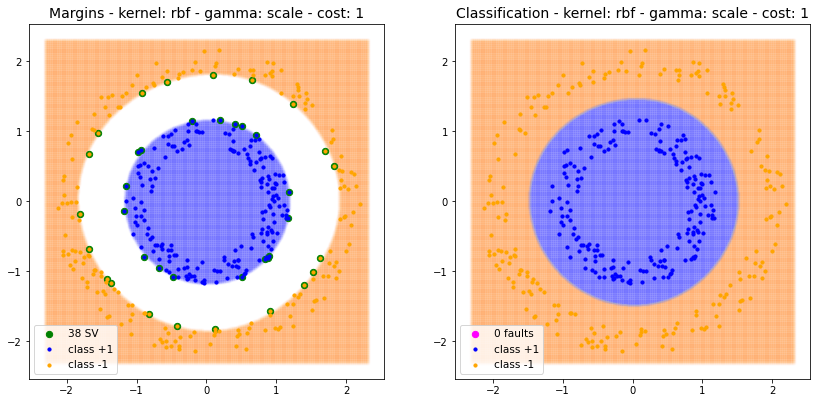

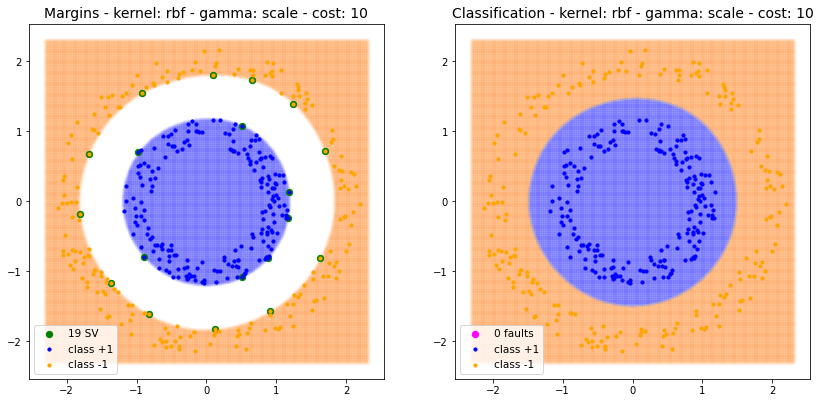

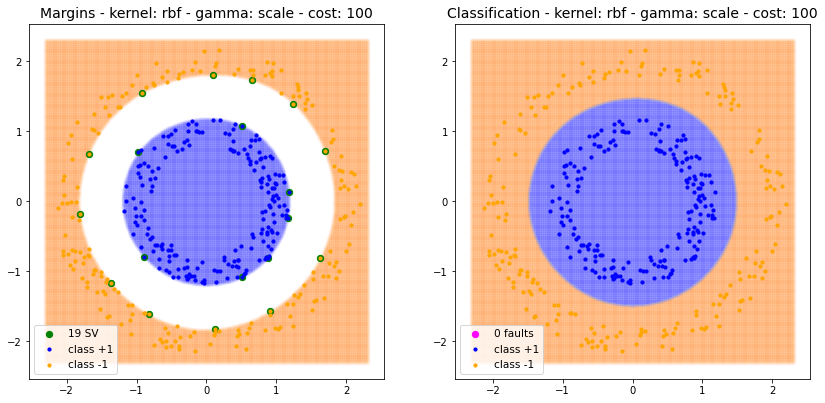

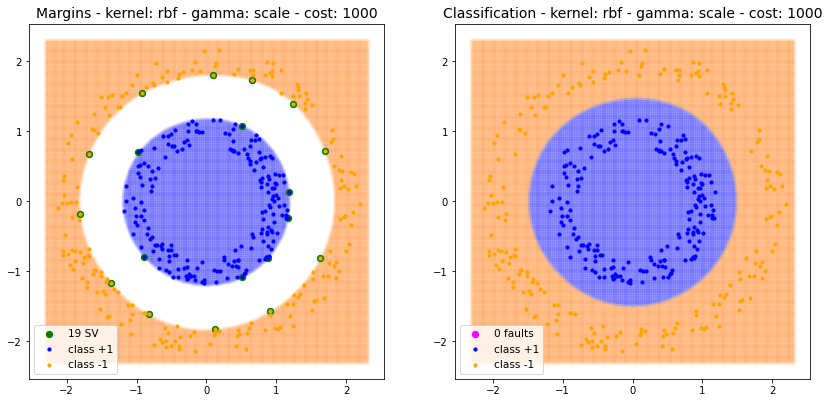

In [7]:
#Here you can play around with the code a little bit. Cell will not be used for grading.
    
plot_list_3 = []

for C in [0.1, 1, 10, 100, 1000]:
    model = svm.SVC(C=C, kernel="rbf")
    model.fit(X,y)
    
    axs = plot_data(X,y,model)
    plots_list_2.append(axs)

<h3 style="color:rgb(210,90,80)">Question 2 (5 points):</h3>

What observations can you make from your plots? (several options may be correct):

    
_f)  The higher the cost the more support vectors we have. <br>
_g)  The decision boarders don't change drastically with increasing $C$, only the number of support vectors does. <br>

To answer the question assign to variables in the next cell **True** or **False** boolean values.<br>
To earn points **assign values to all variables**

In [8]:
example_true = True
example_False = False

f_ = False
g_ = True

* Now use function **pol2cart()** which returns **100 two-dimensional** points which are **uniformly** distributed within the circle of radius $r=0.3$ to generate new datapoints. Label these points with $-1$ and add them to the main "X" feature matrix and "y" label vector. Your new variables will be **X_new** and **y_new**. #q wrong wording, probably you mean sphere instead of circle (circle is 2d ;))
* Now use an **rbf kernel** and again play around with the parameter to explore the effects on the classification performance by again using the plot_data function in an appropriate way. Try out small costs $C \sim 0.1$ and large costs $ C\sim 1000$ and also iterate over different values of $\gamma := 1/(2\sigma^2)$ (compare RBF defintion in lecture slides), ranging from $0.1$ to $1$. Again report your observations in the subsequent question.
* Store "axs" in plot_list_4 the same way as you did above.
<h3 style="color:rgb(210,90,80)">Code 2 (10 points):</h3>

In [9]:
#code that should help you
#leave as it is
X,y=load_data(1)
def pol2cart(r, phi):
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return(x, y)

In [10]:
#define new data ↓↓↓
X_new, y_new = np.concatenate((X, np.array([pol2cart(r, phi) for r, phi in zip(np.random.uniform(0, 0.3, size=(100,)), np.random.uniform(0, 2*np.pi, size=100,))]))), np.concatenate((y, np.array([-1]*100)))

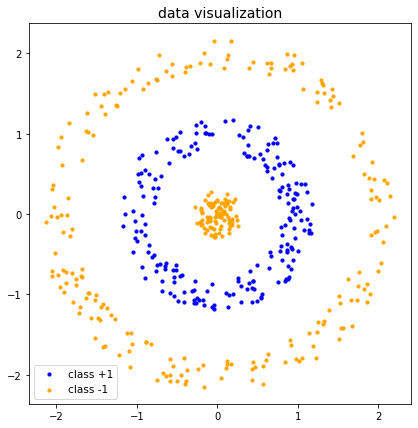

In [11]:
#plot new data ↓↓↓
plot3 = plot_data(X_new, y_new)

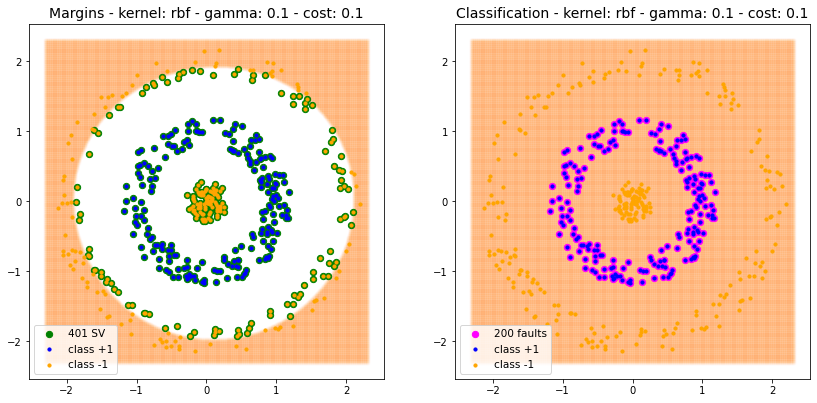

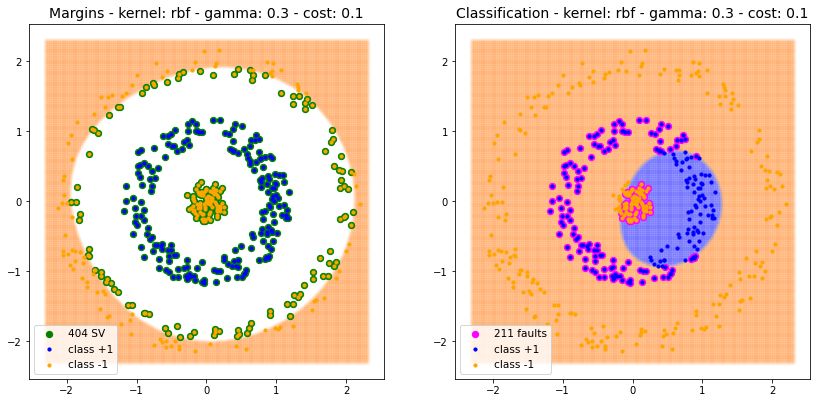

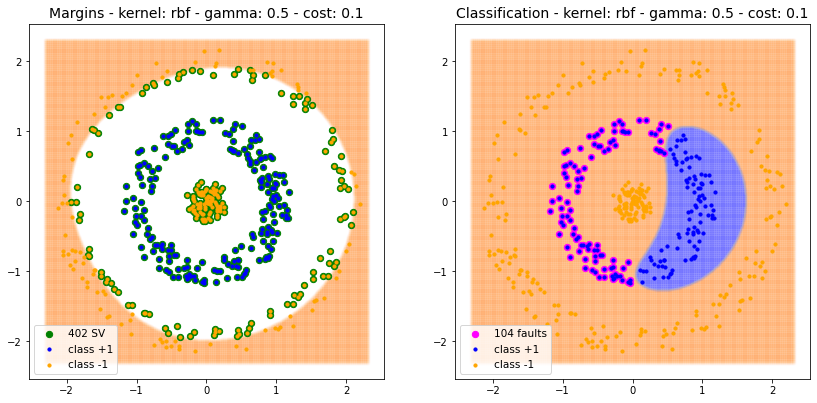

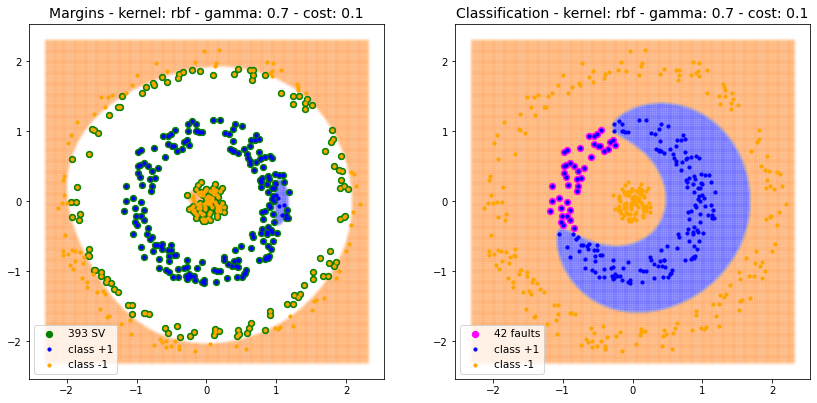

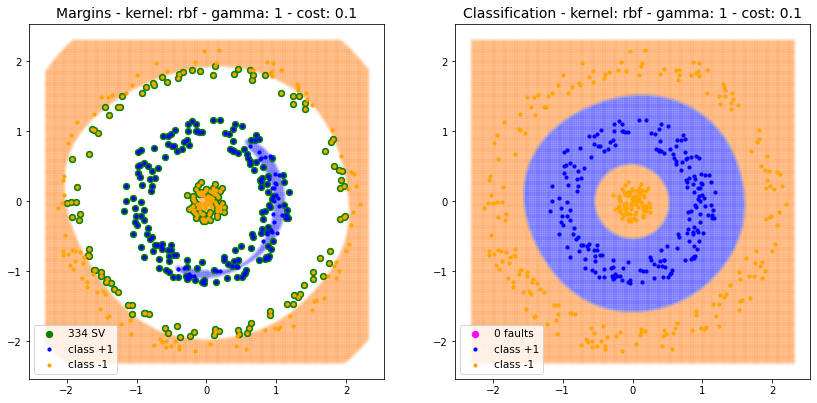

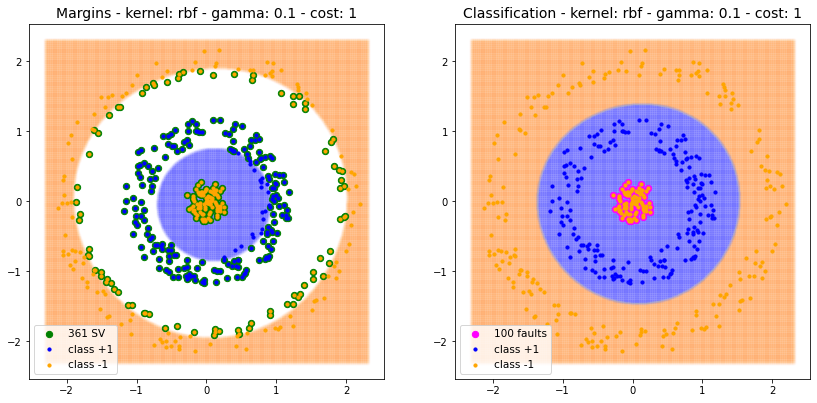

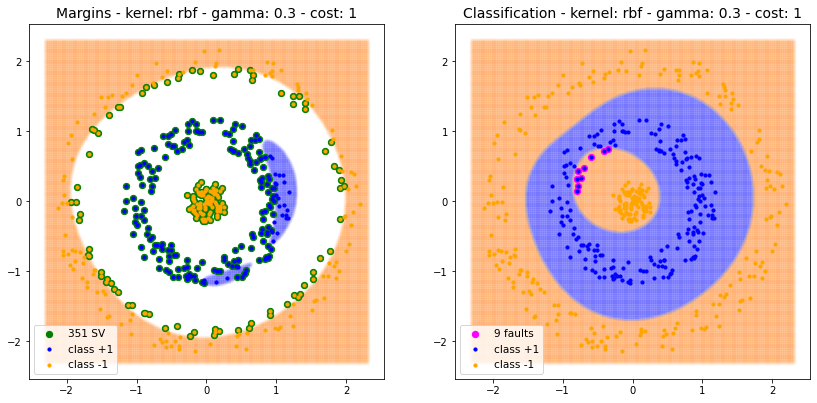

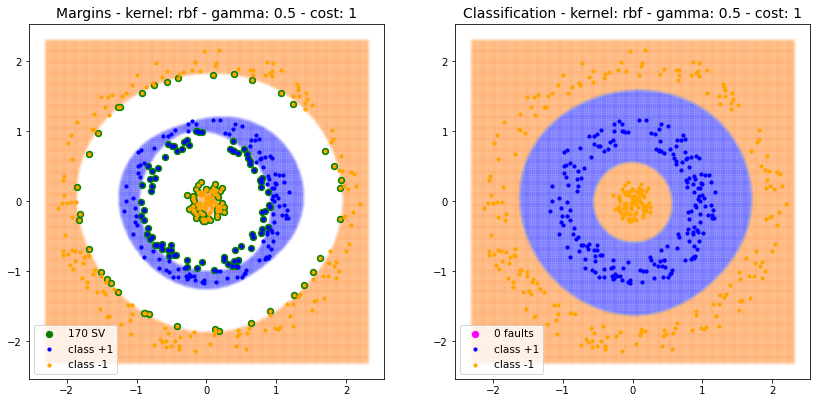

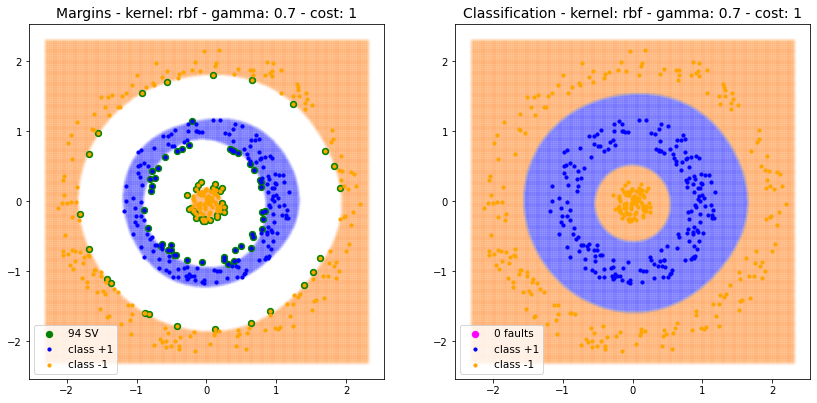

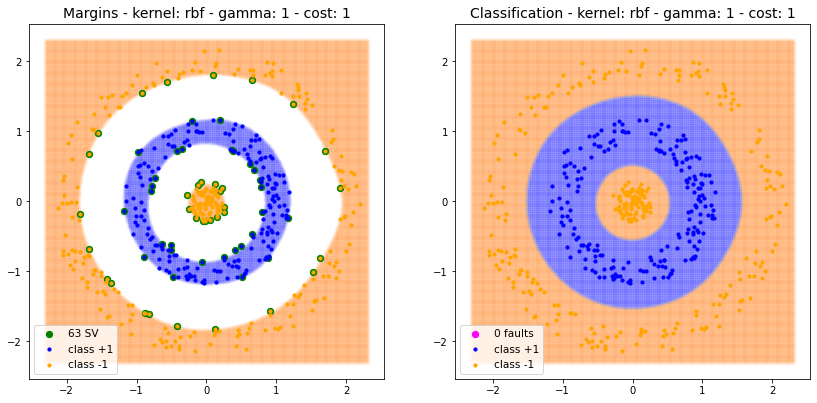

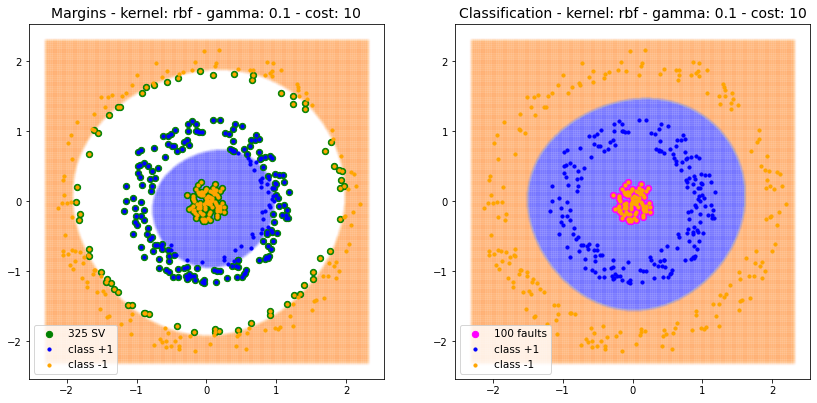

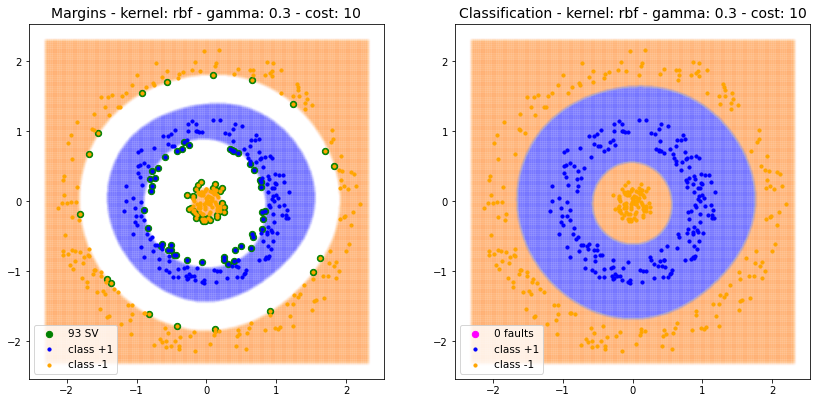

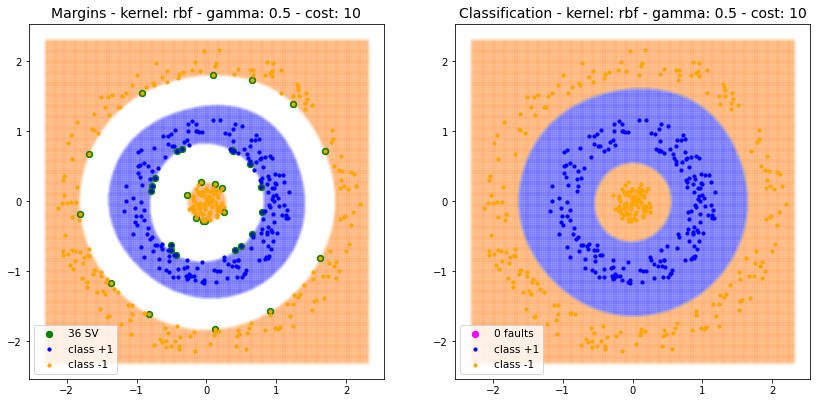

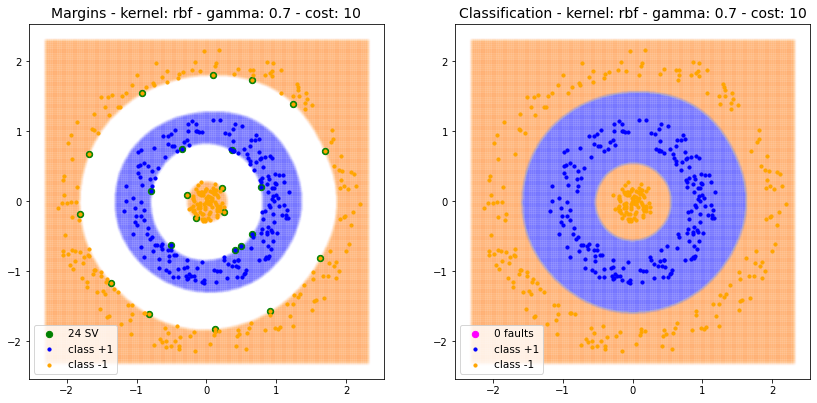

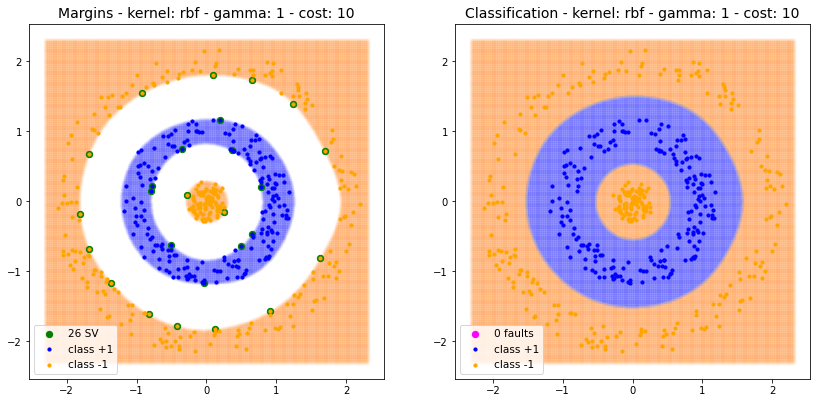

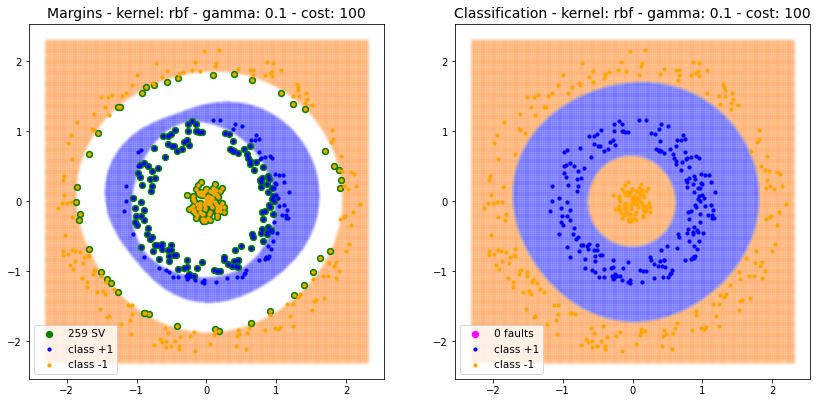

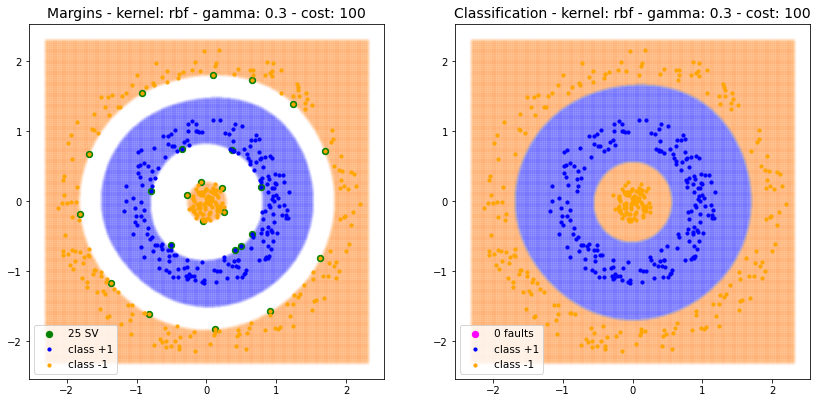

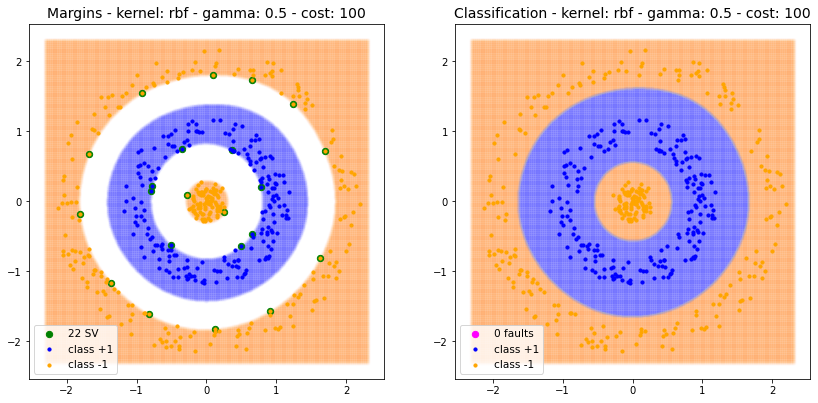

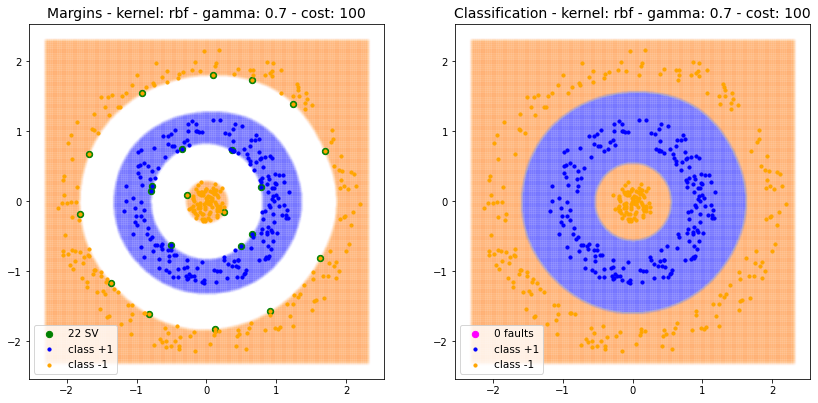

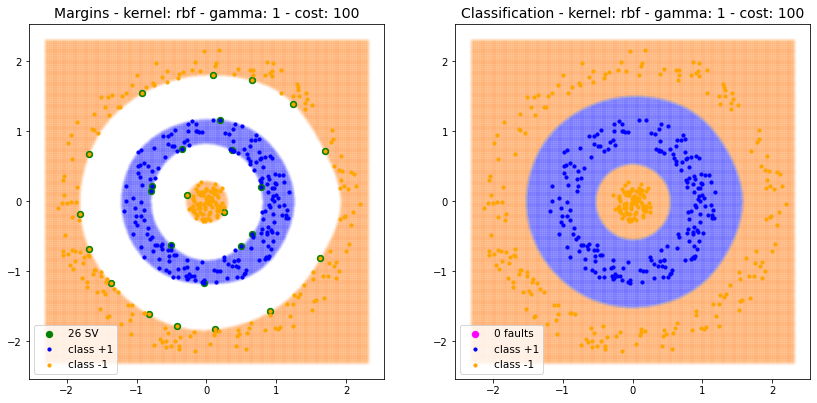

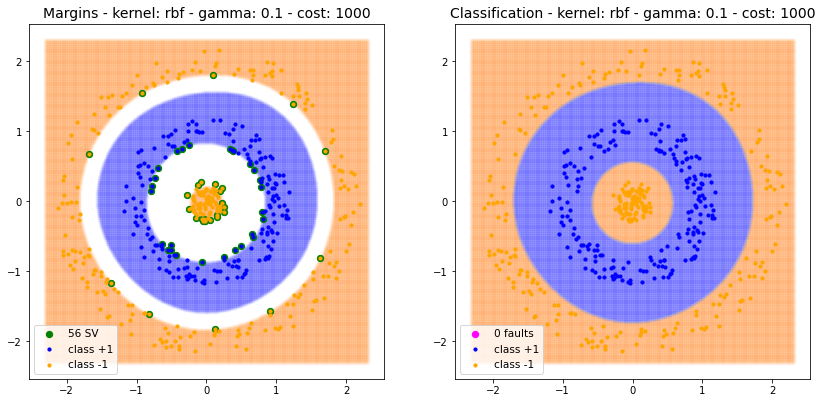

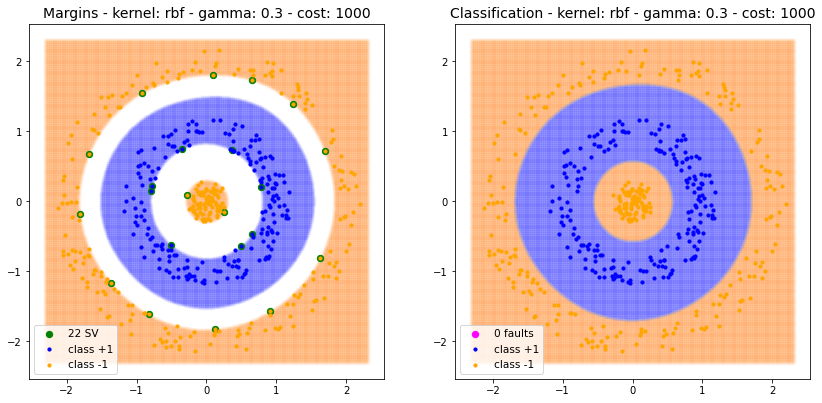

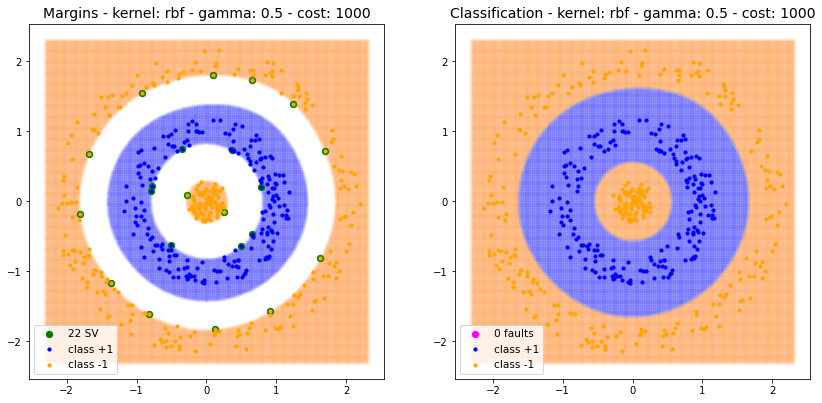

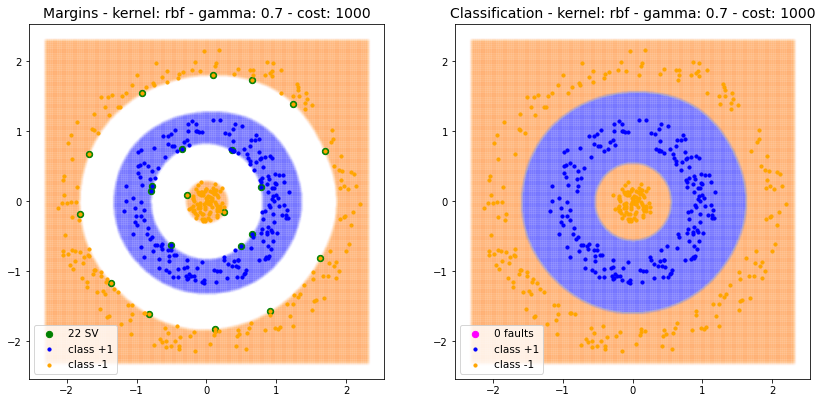

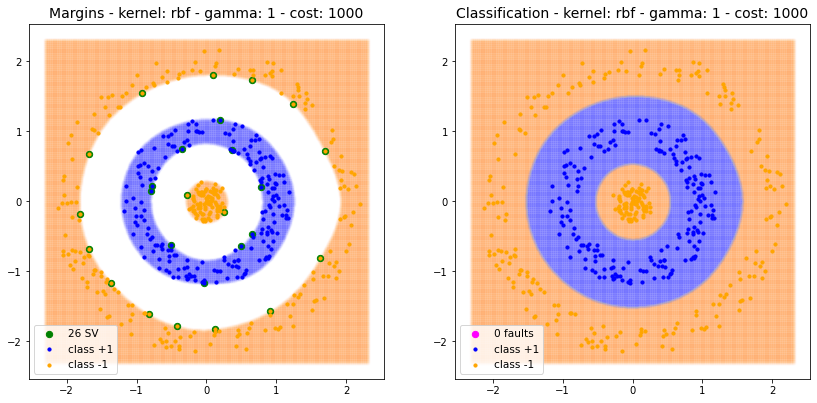

In [12]:
#plot your model ↓↓↓
cost_values = [0.1, 1, 10, 100, 1000]
gamma_values = [0.1, 0.3, 0.5, 0.7, 1]
plots_list_4 = []

for cost in cost_values:
    for gamma in gamma_values:
        model = svm.SVC(C=cost, gamma=gamma, kernel="rbf")
        model.fit(X_new,y_new)

        axs = plot_data(X_new,y_new,model)
        plots_list_4.append(axs)

<h3 style="color:rgb(210,90,80)">Question 2 (5 points):</h3>

What observations can you make from your plots? Tick the correct boxes:


_h) For a fixed $\gamma$, the larger the cost, the higher the number of support vectors .<br>
_i )   For relatively large $C$ and relatively large $\gamma$ (say $C \geq 100$ and $\gamma > 0.5$), enlarging $\gamma$ further doens't improve your performance significantly. <br>
_j ) For fixed $C$, increasing $\gamma$ usually reduces the model complexity of the SVM. <br>

To answer the question assign to variables in the next cell **True** or **False** boolean values.<br>
To earn points **assign values to all variables**

In [13]:
example_true = True
example_False = False

h_ = False
i_ = True
j_ = True

* Finally we want to investigate, how the RBF kernel classifier reacts to outliers. To this end add a single point $(1.8,1.2)$ to your new data set (with the additional circle around $0$) and label it with $y=+1$. Again plot the data set. #q additional circle around $0$?
* Again use an RBF kernel and play around with the parameter to explore the effects on the classification performance by again using the plot_data function in an appropriate way. Try out small costs $C\sim 0.1$ and large costs $C\sim 1000$ and also iterate over different values of $\gamma$, ranging from $0.1$ to $1$. Report your observations in the subsequent question. #q no mistake, but maybe you could reformulate some sentences, very often the sentences start off with the same words and there are many repetitions of word like "again"
* Store "axs" in plot_list_5 the same way as you did above.
<h3 style="color:rgb(210,90,80)">Code 3 (10 points):</h3>

In [14]:
# update X_new and y_new by adding point as described in the task↓↓↓
X_new = np.concatenate((X_new, np.array([[1.8, 1.2]])))
y_new = np.concatenate((y_new, np.array([1])))

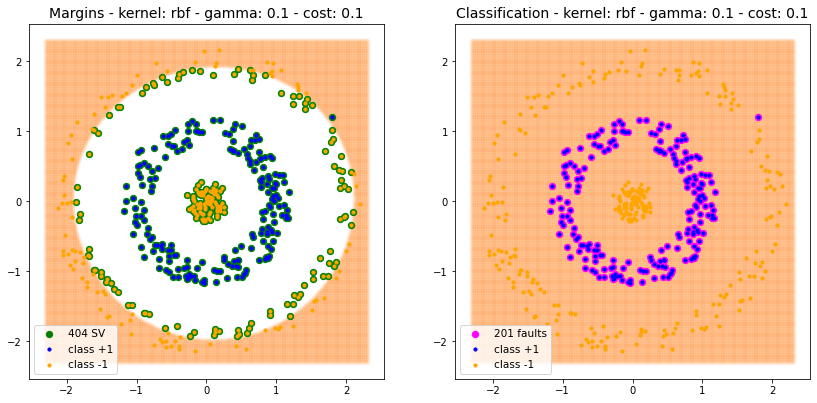

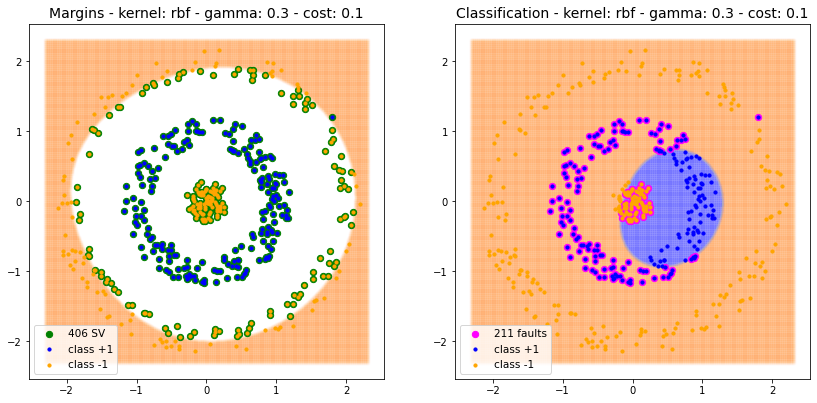

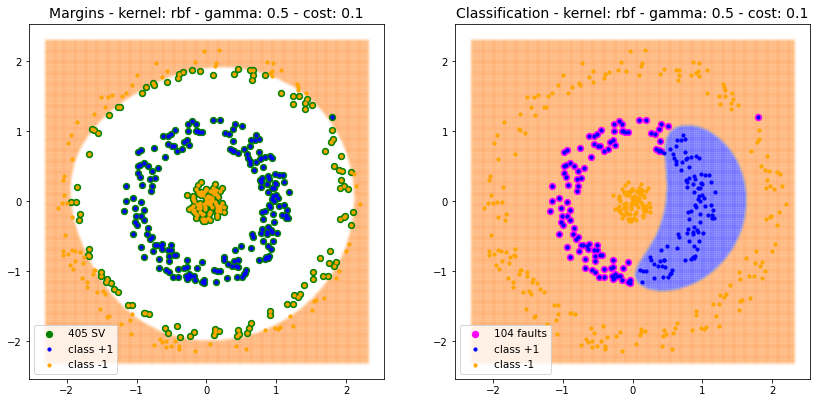

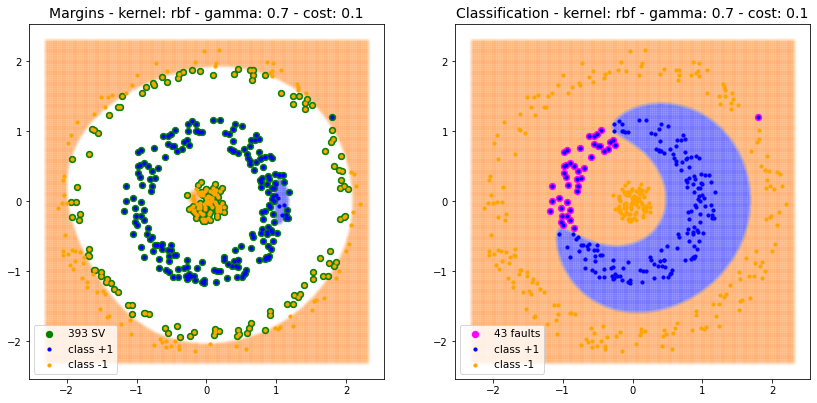

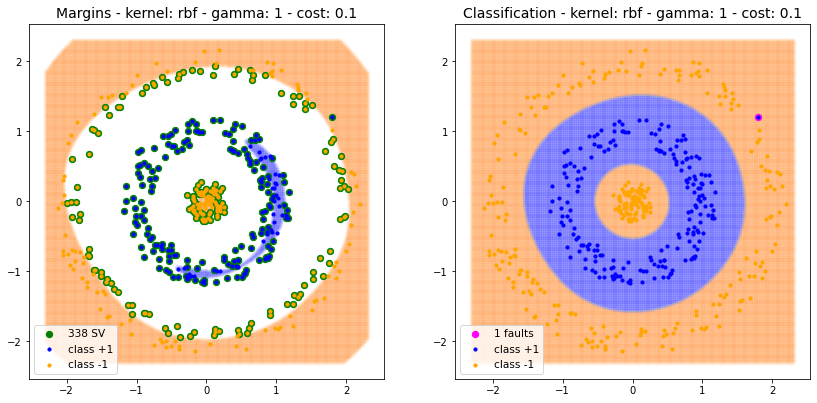

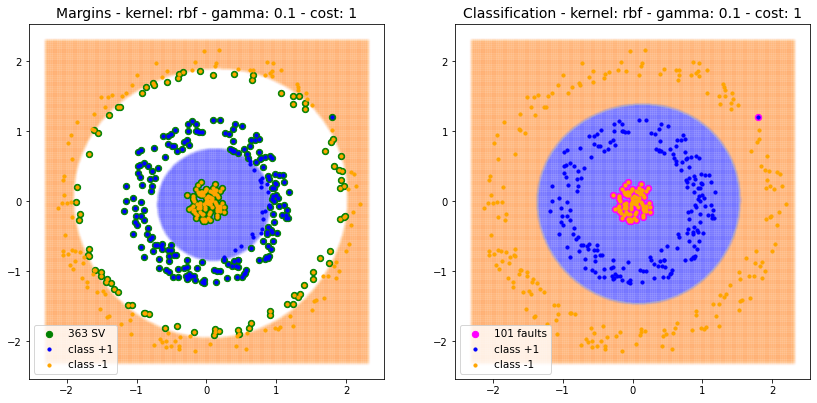

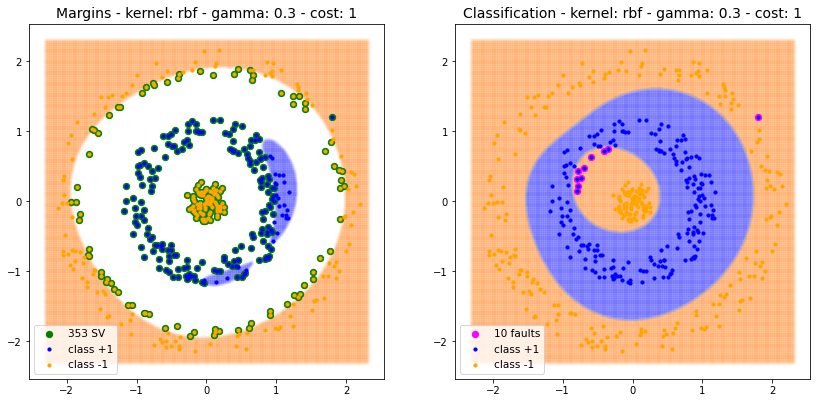

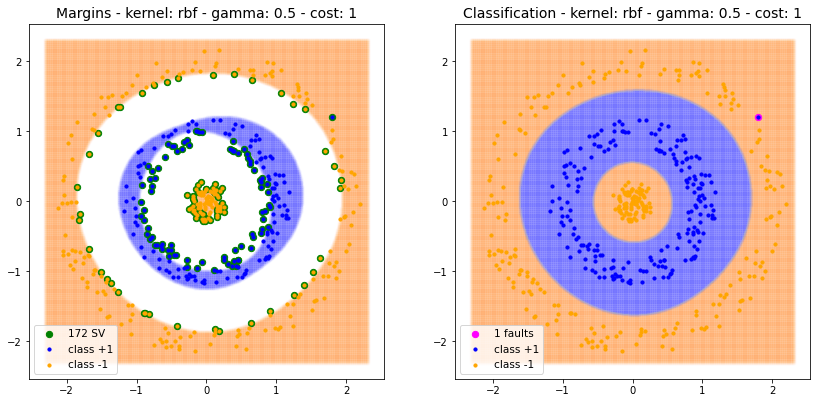

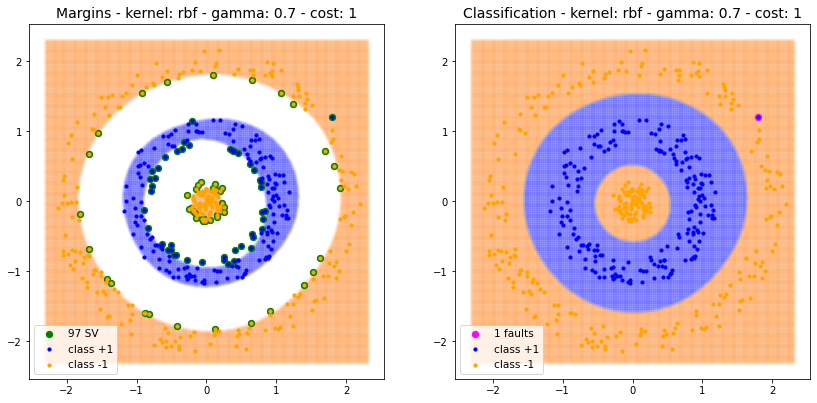

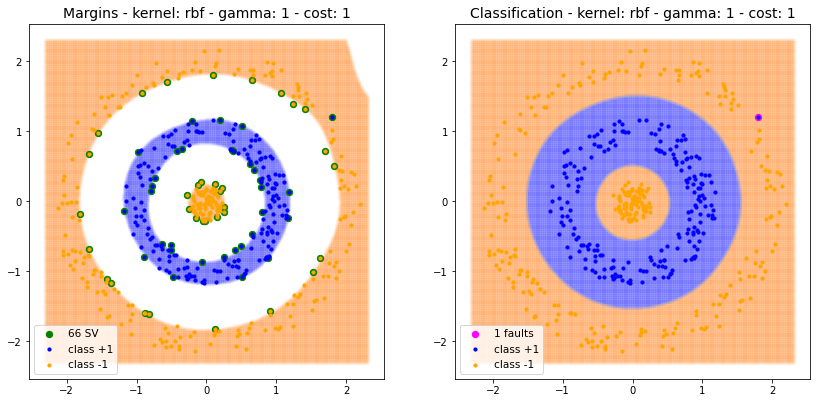

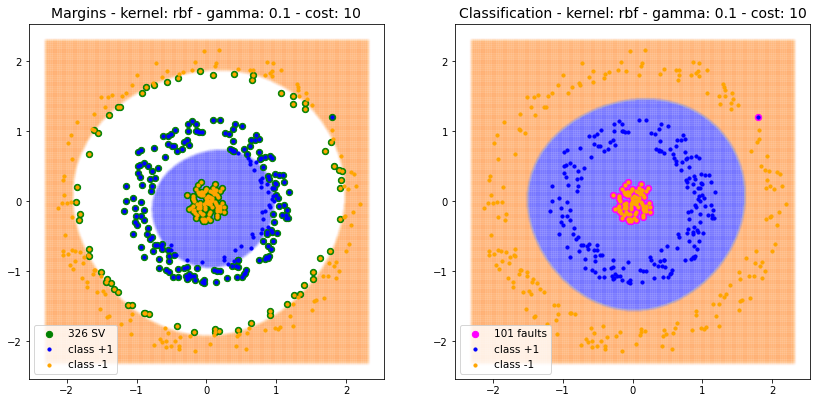

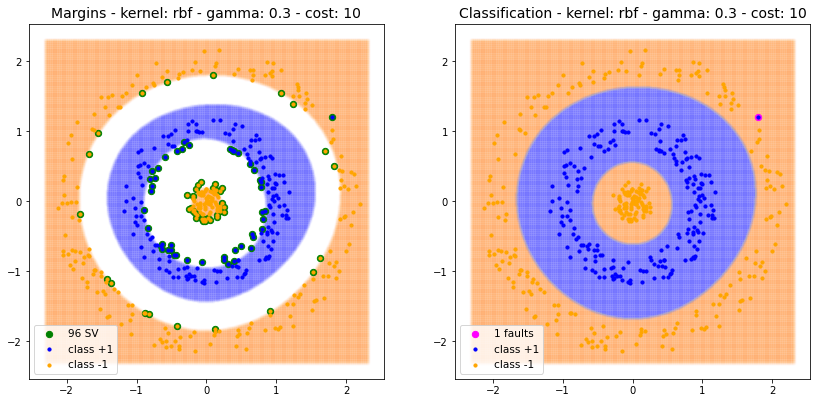

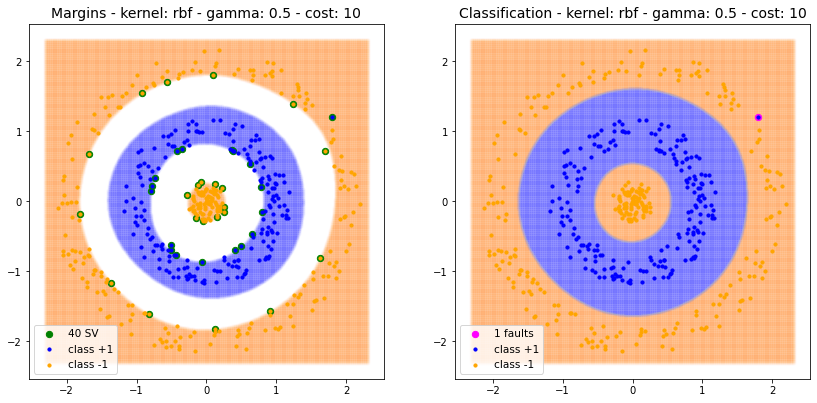

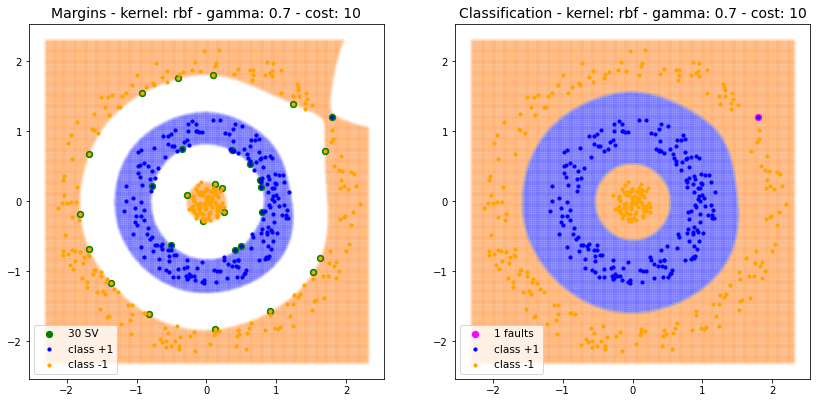

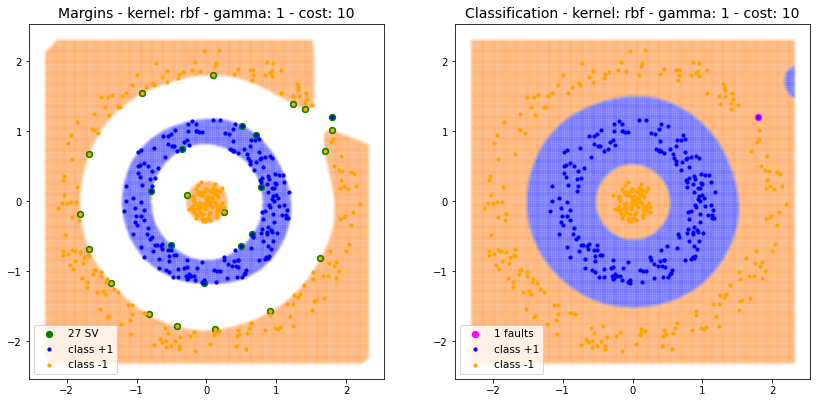

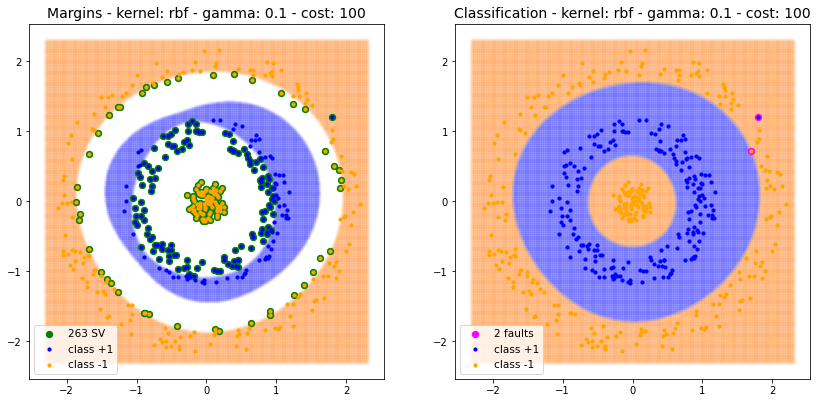

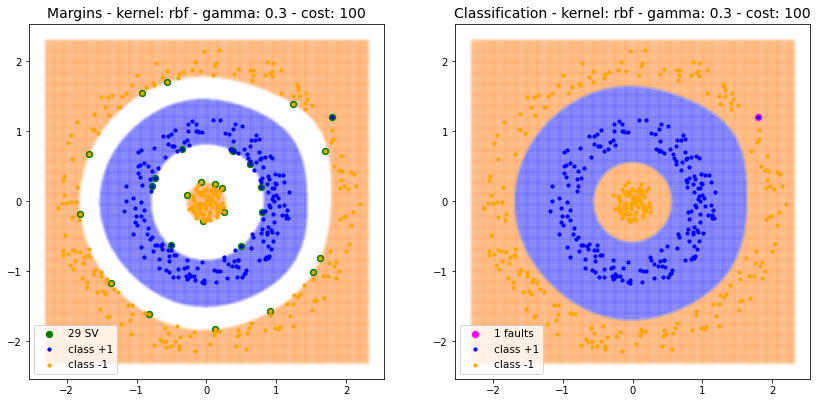

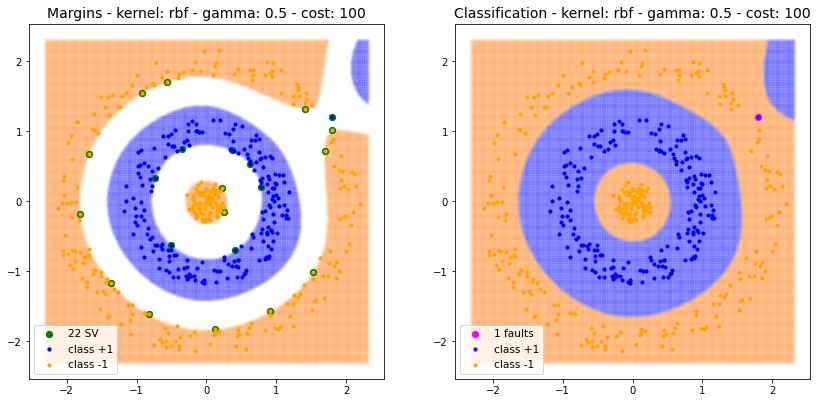

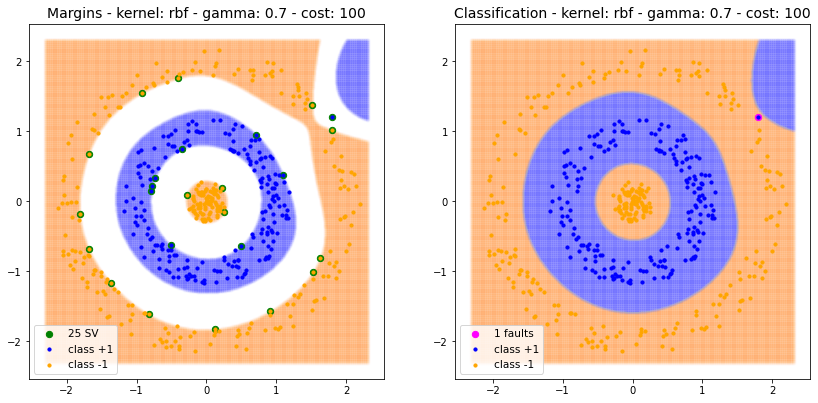

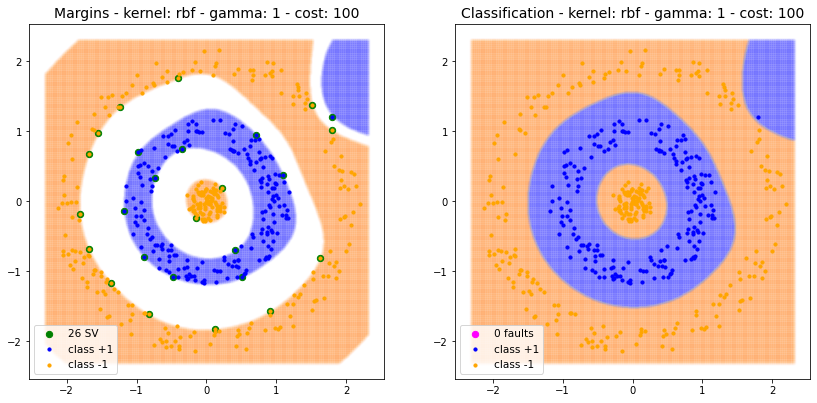

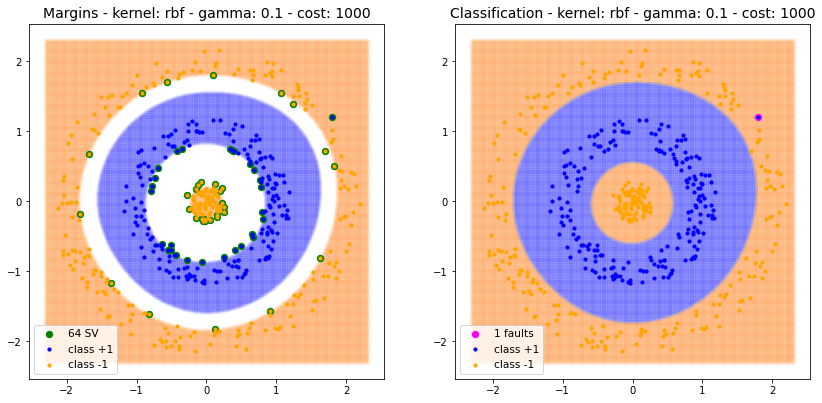

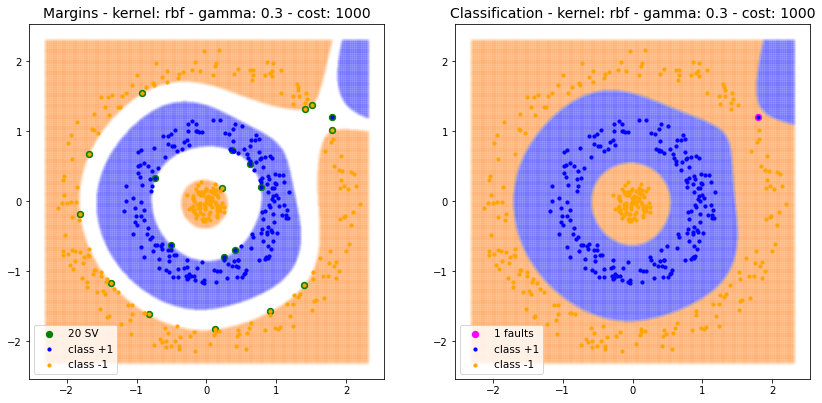

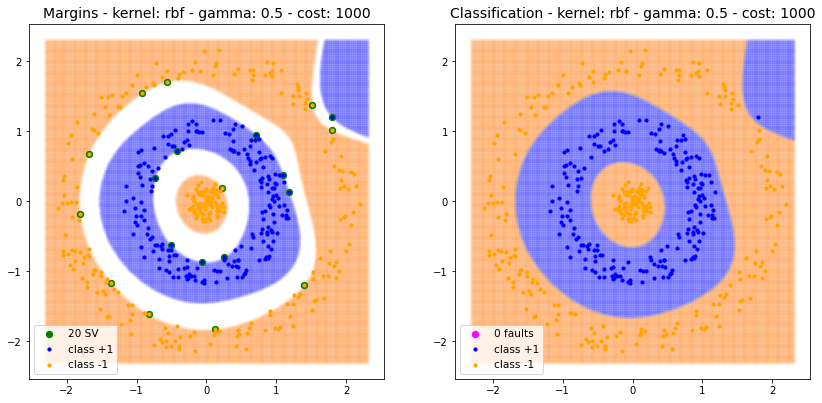

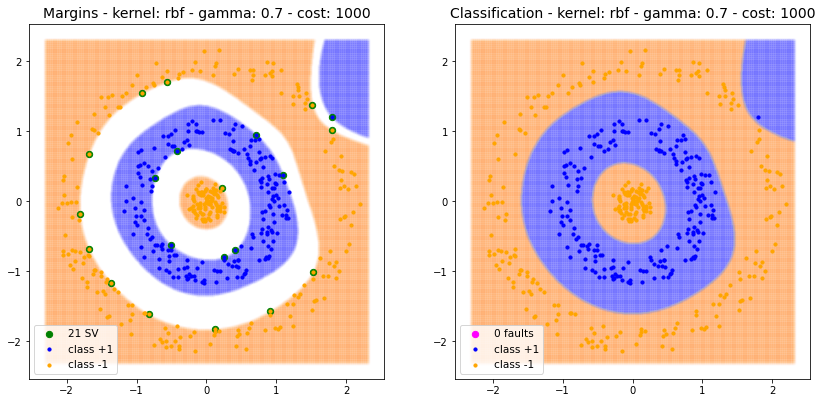

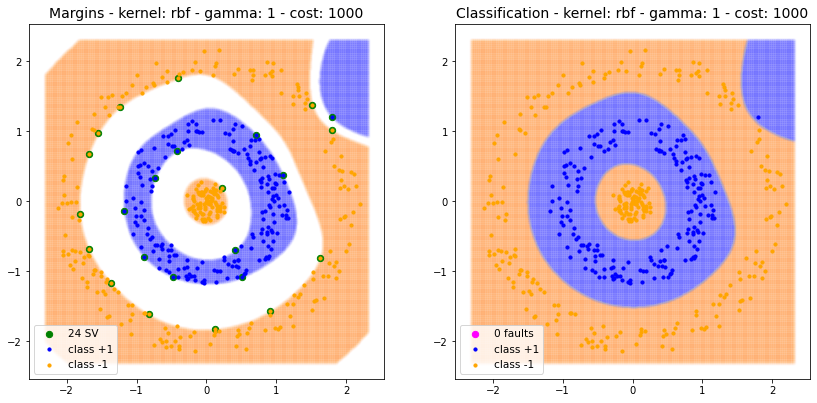

In [15]:
#plot your model ↓↓↓
cost_values = [0.1, 1, 10, 100, 1000]
gamma_values = [0.1, 0.3, 0.5, 0.7, 1]
plots_list_5 = []

for cost in cost_values:
    for gamma in gamma_values:
        model = svm.SVC(C=cost, gamma=gamma, kernel="rbf")
        model.fit(X_new,y_new)

        axs = plot_data(X_new,y_new,model)
        plots_list_5.append(axs)

<h3 style="color:rgb(210,90,80)">Question 3 (5 points):</h3>

What observations can you make from your plots? Tick the correct boxes:

    
_k)  For relatively low costs (e.g. $C\le 1$) and an appropriately chosen $\gamma$ (e.g. $0.9$) the classifier correctly classifies all points except the outlier. <br>
_l)  For relatively high costs (e.g. $C\geq 100$) the classifier always, i.e. independent of $\gamma$, shows a region of the positive class near the outlier.<br>
_m)  Classifiers with high costs ($C\geq 100$ say) and high $\gamma$ ($ \gamma \geq 0.5$) are susceptible to overfitting.<br>

To answer the question assign to variables in the next cell **True** or **False** boolean values.<br>
To earn points **assign values to all variables**

You are of course encouraged to further apply the given plot routine to further datasets and different hyperparameters to get further intuition!

In [16]:
example_true = True
example_False = False

k_ = True
l_ = False
m_ = True

In [17]:
#here you can experiment, cell is not graded

<h2 style=\color:rgb(0,120,170)\>Technical cells</h2>
    The cells below are needed for efficient unittesting.
    Do not delete or change in order to receive proper evaluation.<br>
    Executability check might help you with datatypes, but does not guarantee your answers are 100% correct

In [18]:
import matplotlib.figure
import matplotlib.collections
import matplotlib.axes
def X_y_tolist(X,y):
    return X.tolist(), y.tolist()

def plottype(p, string):
    if isinstance(p, (tuple, list, np.ndarray)):
        p = np.array(p)
        p = p.flatten()
        for i, el in enumerate(p):   
            if isinstance(el, (matplotlib.figure.Figure, matplotlib.collections.PathCollection, matplotlib.axes.Axes)):
                print(f"Object {i} in {string} is correct")
            else:
                print(type(el))
                raise ValueError("Check "+f'{p=}'.split('=')[0] +" again")
    elif isinstance(p, (matplotlib.figure.Figure, matplotlib.collections.PathCollection, matplotlib.axes.Axes)):
        print(f"Variable {string} is correct")
    else:
        raise ValueError(f"Check {string} again")

def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [19]:
try:
    X_y_tolist(X,y)
except:
    raise ValueError("Check your X and y variables")
try:
    X_y_tolist(X_new,y_new)
except:
    raise ValueError("Check your X_new and y_new variables")

plottype(plot1, f'{plot1=}'.split('=')[0])  
plottype(plots_list_2, f'{plots_list_2=}'.split('=')[0])  
plottype(plot3, f'{plot3=}'.split('=')[0])  
plottype(plots_list_4, f'{plots_list_4=}'.split('=')[0]) 
plottype(plots_list_5, f'{plots_list_5=}'.split('=')[0])
testoptions(np.array([a_,b_,c_,d_,e_,f_,g_,h_,i_,j_,k_,l_,m_]))

Variable plot1 is correct
Object 0 in plots_list_2 is correct
Object 1 in plots_list_2 is correct
Object 2 in plots_list_2 is correct
Object 3 in plots_list_2 is correct
Object 4 in plots_list_2 is correct
Object 5 in plots_list_2 is correct
Object 6 in plots_list_2 is correct
Object 7 in plots_list_2 is correct
Object 8 in plots_list_2 is correct
Object 9 in plots_list_2 is correct
Object 10 in plots_list_2 is correct
Object 11 in plots_list_2 is correct
Object 12 in plots_list_2 is correct
Object 13 in plots_list_2 is correct
Object 14 in plots_list_2 is correct
Object 15 in plots_list_2 is correct
Object 16 in plots_list_2 is correct
Object 17 in plots_list_2 is correct
Object 18 in plots_list_2 is correct
Object 19 in plots_list_2 is correct
Variable plot3 is correct
Object 0 in plots_list_4 is correct
Object 1 in plots_list_4 is correct
Object 2 in plots_list_4 is correct
Object 3 in plots_list_4 is correct
Object 4 in plots_list_4 is correct
Object 5 in plots_list_4 is correct
Ob